In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
#we are looking at household that are credit fearful meaning they have been rejected or have faer they can be rejected
# social stratification is dividing different group based on different quality
# method chaining is used to do multiple transformation including comman, full stop etc

In [7]:
#Prepare Data
#Import
#First, we need to load the data, which is stored in a compressed CSV file: SCFP2019.csv.gz. 
#In the last project, you learned how to decompress files using gzip and the command line. However, pandas read_csv function can work with compressed files directly.

In [2]:
df = pd.read_csv("\\Users\\User\\survey of consumer finace 2022/survey of consumer finance.csv")

In [3]:
df.head()
print("df shape:", df.shape)
df.head()

df shape: (22975, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956121,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


In [21]:
#One of the first things you might notice here is that this dataset is HUGE — over 20,000 rows and 351 columns! SO MUCH DATA!!! 
#We won't have time to explore all of the features in this dataset, but you can look in the data dictionary for this project for details and links to the official Code Book. 
#For now, let's just say that this dataset tracks all sorts of behaviors relating to the ways households earn, save, and spend money in the United States.
#For this project, we're going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years.
#"These households are identified in the "TURNFEAR" column.

In [4]:
#Task 6.1.2: Use amask to subset create df to only households that have been turned down or feared being turned down for credit ("TURNFEAR" == 1). 
#Assign this subset to the variable name df_fear.
mask = df["TURNFEAR"]==1
df_fear = df[mask]
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear shape: (3839, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


In [6]:
mask.sum() # for confirmation

3839

In [5]:
#Age
#Now that we have our subset, let's explore the characteristics of this group. One of the features is age group ("AGECL").


#Task 6.1.3: Create a list age_groups with the unique values in the "AGECL" column. 
#Then review the entry for "AGECL" in the Code Book to determine what the values represent.

age_groups =df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [1 4 2 3 5 6]


In [25]:
# num   age
#1   <35
#2   35-44
#3   45-54
#4   55-64
#5    65-75
#6   >=75

#This simplifies data storage, but it's not very human-readable. So before we create a visualization, 
#let's create a version of this column that uses the actual group names.

In [6]:
#let see
age_cl =df_fear["AGECL"]
age_cl. head(10)


20     1
21     1
22     1
23     1
24     1
110    4
111    4
112    4
113    4
114    4
Name: AGECL, dtype: int64

In [7]:
#Task 6.1.4: Create a Series agecl that contains the observations from "AGECL" using the true group names.
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl =df_fear["AGECL"].replace(agecl_dict)
age_cl.head(10)

20     Under 35
21     Under 35
22     Under 35
23     Under 35
24     Under 35
110       55-64
111       55-64
112       55-64
113       55-64
114       55-64
Name: AGECL, dtype: object

In [31]:
#Now that we have better labels, let's make a bar chart and see the age distribution of our group.

In [33]:
#Task 6.1.5: Create a bar chart showing the value counts from age_cl.
#Be sure to label the x-axis "Age Group", the y-axis "Frequency (count)", and use the title "Credit Fearful: Age Groups".

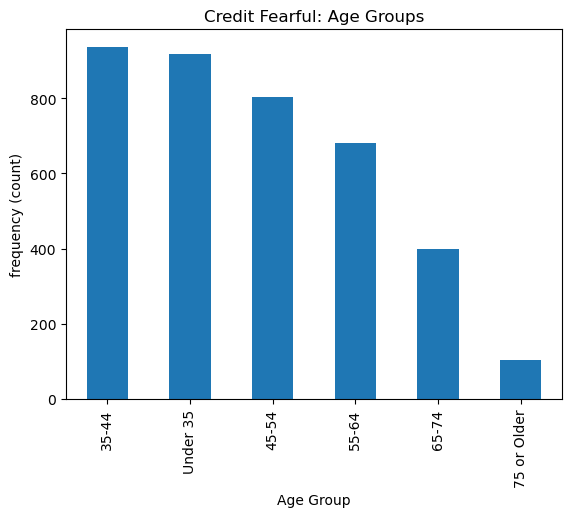

In [8]:
age_cl_value_counts = age_cl.value_counts()

age_cl_value_counts.plot(
    kind="bar",
    xlabel="Age Group",
    ylabel="frequency (count)",
    title="Credit Fearful: Age Groups"
);

In [11]:
age_cl.value_counts()
#it support the bar chat

35-44          936
Under 35       917
45-54          802
55-64          682
65-74          398
75 or Older    104
Name: AGECL, dtype: int64

In [37]:
#You might have noticed that by creating their own age groups, the authors of the survey have basically made a histogram for us comprised of 6 bins. 
#Our chart is telling us that many of the people who fear being denied credit are younger. 
#But the first two age groups cover a wider range than the other four. 
#So it might be useful to look inside those values to get a more granular understanding of the data.

#To do that, we'll need to look at a different variable: "AGE". Whereas "AGECL" was a categorical variable, "AGE" is continuous, so we can use it to make a histogram of our own.

#To be sure let make our histogram from the raw ages not the age categories

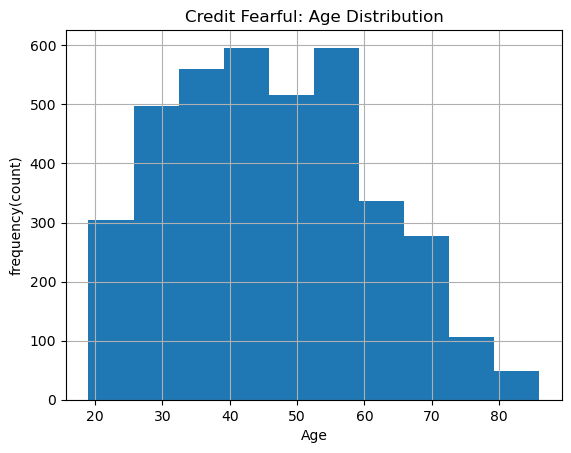

In [12]:
#Task 6.1.6: Create a histogram of the "AGE" column with 10 bins.
#Be sure to label the x-axis "Age", the y-axis "Frequency (count)", and use the title "Credit Fearful: Age Distribution".

# Plot histogram of "AGE"
df_fear["AGE"].hist(bins=10)
plt.xlabel("Age")
plt.ylabel("frequency(count)")
plt.title("Credit Fearful: Age Distribution");

In [40]:
#frrom the rraw data we see that

#most of the fearful household was between 30 t0 60. this give us real perspective

In [ ]:
#for race

#1 represent "White/Non-Hispanic",
#2...... "Black/African-American",
#3...."Hispanic",
#5..... "Other",

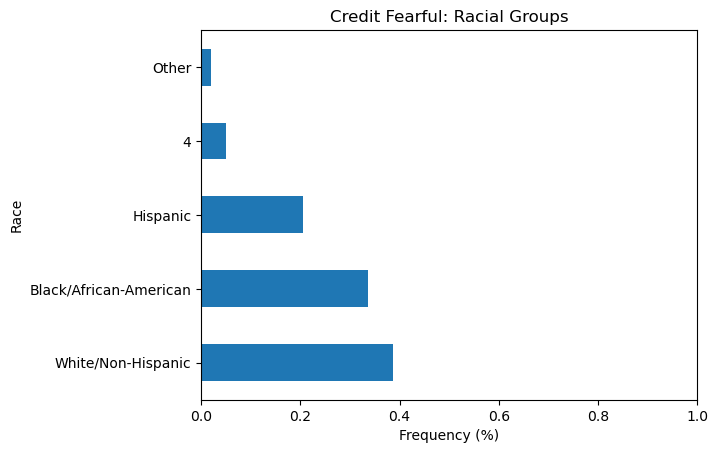

In [13]:
#Task 6.1.7: Create a horizontal bar chart showing the normalized value counts for "RACE". In your chart, you should replace the numerical values with the true group names. 
#Be sure to label the x-axis "Frequency (%)", the y-axis "Race", and use the title "Credit Fearful: Racial Groups".
#Finally, set the xlim for this plot to (0,1).
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
race =df_fear["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize= True)
race_value_counts.plot(kind="barh")
# Create bar chart of race_value_counts
plt.xlim((0,1))

plt.xlim((0, 1)) 
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("Credit Fearful: Racial Groups");

In [53]:
#This suggests that White/Non-Hispanic people worry more about being denied credit, 
#but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.

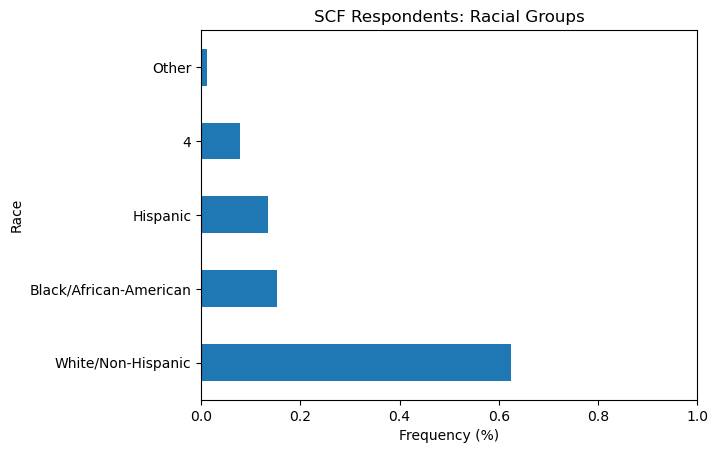

In [14]:


#RACE
#Task 6.1.8: Recreate the horizontal bar chart you just made, but this time use the entire dataset df instead of the subset df_fear. 
#The title of this plot should be "SCF Respondents: Racial Groups"

race = df["RACE"].replace(race_dict)
race_value_counts = race.value_counts(normalize=True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind="barh")
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

In [55]:
#How does this second bar chart change our perception of the first one? 
#On the one hand, we can see that White Non-Hispanics account for around 60% of whole dataset, but only 43% of credit fearful respondents. 
#On the other hand, Black and Hispanic respondents represent 20% of the whole dataset but 39% of credit fearful respondents. 
#In other words, Black and Hispanic households are actually more likely to be in the credit fearful group.




#Data Ethics: It's important to note that segmenting customers by race (or any other demographic group) for the purpose of lending is illegal in the United States. 
#The same thing might be legal elsewhere, but even if it is, making decisions for things like lending based on racial categories is clearly unethical. 
#This is a great example of how easy it can be to use data science tools to support and propagate systems of inequality. 
#Even though we're "just" using numbers, statistical analysis is never neutral, so we always need to be thinking critically about how our work will be interpreted by the end-user.

In [15]:
#INCOME
#we have something like this in the data dictionary
#1 represent"0-20",
#2: "21-39.9",
#3: "40-59.9",
#4: "60-79.9",
#5: "80-89.9",
#6: "90-100",





#Task 6.1.9: Create a DataFrame df_inccat that shows the normalized frequency for income categories for both the credit fearful and non-credit fearful households in the dataset. Your final DataFrame should look something like this:

    #TURNFEAR   INCCAT  frequency
#0          0   90-100   0.297296
#1          0  60-79.9   0.174841
#2          0  40-59.9   0.143146
#3          0     0-20   0.140343
#4          0  21-39.9   0.135933
#5          0  80-89.9   0.108441
#6          1     0-20   0.288125
#7          1  21-39.9   0.256327
#8          1  40-59.9   0.228856
#9          1  60-79.9   0.132598
#10         1   90-100   0.048886
#11         1  80-89.9   0.045209

#inccat( income category)

In [19]:
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

df_inccat = ( 
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    . rename("frequency")
    . to_frame()
    .reset_index()
                                        
)

df_inccat

,TURNFEAR,INCCAT,frequency
0,0,90-100,0.303982
1,0,60-79.9,0.162312
2,0,40-59.9,0.144492
3,0,0-20,0.140050
4,0,21-39.9,0.139162
5,0,80-89.9,0.110002
6,1,0-20,0.340714
7,1,21-39.9,0.266476
8,1,40-59.9,0.205001
9,1,60-79.9,0.112529


In [20]:
#Task 6.1.10: Using seaborn, create a side-by-side bar chart of df_inccat. Set hue to "TURNFEAR", and make sure that the income categories are in the correct order along the x-axis. 
#Label to the x-axis "Income Category", the y-axis "Frequency (%)", and use the title "Income Distribution: Credit Fearful vs. Non-fearful".

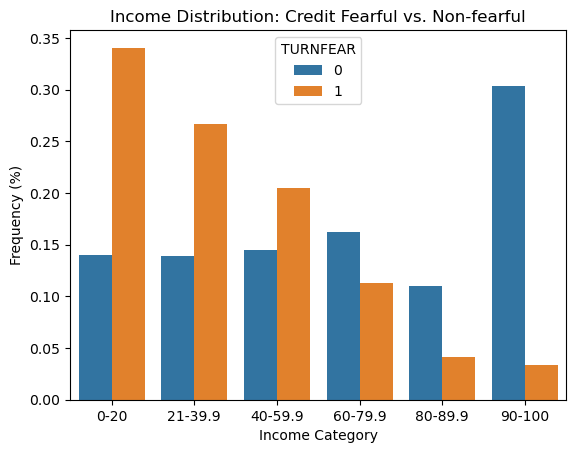

In [21]:
# Create bar chart of `df_inccat`
sns.barplot(
   x="INCCAT",
   y="frequency",
   hue="TURNFEAR", # hue means colour code according to the information in turnfear
   data=df_inccat, # the source of the data
   order=inccat_dict.values()# order by dictionary
)
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

In [22]:
#Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. 
#In other words, the credit fearful have lower incomes.

#So, based on all this, what do we know? 
#Among the people who responded that they were indeed worried about being approved for credit after having been denied in the past five years, a plurality of the young and low-income had the highest number of respondents. 
#That makes sense, right? Young people tend to make less money and rely more heavily on credit to get their lives off the ground, so having been denied credit makes them more anxious about the future.

In [24]:
#Assets
#Not all the data is demographic, though. 
#If you were working for a bank, you would probably care less about how old the people are, and more about their ability to carry more debt.
#If we were going to build a model for that, we'd want to establish some relationships among the variables, and making some correlation matrices is a good place to start.
#First, let's zoom out a little bit. We've been looking at only the people who answered "yes" when the survey asked about "TURNFEAR", 
#but what if we looked at everyone instead? To begin with, let's bring in a clear dataset and run a single correlation.

In [25]:
#Task 6.1.11: Calculate the correlation coefficient for "ASSET" and "HOUSES" in the whole dataset df.
asset_house_corr = df["ASSET"].corr(df["HOUSES"])
print("SCF: Asset Houses Correlation:", asset_house_corr)

SCF: Asset Houses Correlation: 0.5617763110086197


In [26]:
#that's a moderate positive correlation, which we would probably expect, right? For many Americans, the value of their primary residence makes up most of the value of their total assets. 
#What about the people in our TURNFEAR subset, though? Let's run that correlation to see if there's a difference.

In [27]:
#Task 6.1.12: Calculate the correlation coefficient for "ASSET" and "HOUSES" in the whole credit-fearful subset df_fear.
asset_house_corr = df_fear["ASSET"].corr(df_fear["HOUSES"])
print("Credit Fearful: Asset Houses Correlation:", asset_house_corr)

Credit Fearful: Asset Houses Correlation: 0.36494838615588243


In [28]:
# A lower correlation, for credit fearful population their home are a lower % of their  total asset

In [29]:
#Aha! They're different! i 
#but the relationship between the total value of assets and the value of the primary residence is lower for our TURNFEAR group than it is for the population as a whole.
#Let's make correlation matrices using the rest of the data for both df and df_fear and see if the differences persist. 
#Here, we'll look at only 5 features: "ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC"

In [31]:
#Task 6.1.13: Make a correlation matrix using df, considering only the columns "ASSET", "HOUSES", "INCOME", "DEBT", and "EDUC".
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]
corr = df[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.561776,0.706685,0.307137,0.120137
HOUSES,0.561776,1.000000,0.384699,0.251876,0.186120
INCOME,0.706685,0.384699,1.000000,0.306534,0.096549
DEBT,0.307137,0.251876,0.306534,1.000000,0.086561
EDUC,0.120137,0.186120,0.096549,0.086561,1.000000


In [32]:
 #Task 6.1.14: Make a correlation matrix using df_fear.
corr = df_fear[cols].corr()
corr.style.background_gradient(axis=None)

,ASSET,HOUSES,INCOME,DEBT,EDUC
ASSET,1.000000,0.364948,0.893282,0.477171,0.110655
HOUSES,0.364948,1.000000,0.314501,0.676984,0.195174
INCOME,0.893282,0.314501,1.000000,0.456622,0.108845
DEBT,0.477171,0.676984,0.456622,1.000000,0.182570
EDUC,0.110655,0.195174,0.108845,0.182570,1.000000


In [33]:
#Whoa! There are some pretty important differences here! The relationship between "DEBT" and "HOUSES" is positive for both datasets, but while the coefficient for df is fairly weak at 0.26, the same number for df_fear is 0.67.

#Remember, the closer a correlation coefficient is to 1.0, the more exactly they correspond. In this case, that means the value of the primary residence and the total debt held by the household is getting pretty close to being the same. This suggests that the main source of debt being carried by our "TURNFEAR" folks is their primary residence, which, again, is an intuitive finding.

#"DEBT" and "ASSET" share a similarly striking difference, as do "EDUC" and "DEBT" which, while not as extreme a contrast as the other, is still big enough to catch the interest of our hypothetical banker.

#Let's make some visualizations to show these relationships graphically.

In [34]:

#Education
First, let's start with education levels "EDUC", comparing credit fearful and non-credit fearful groups.





#Task 6.1.15: Create a DataFrame df_educ that shows the normalized frequency for education categories for both the credit fearful and non-credit fearful households in the dataset. This will be similar in format to df_inccat, but focus on education. Note that you don't need to replace the numerical values in "EDUC" with the true labels.

 #   TURNFEAR  EDUC  frequency
#0          0    12   0.257481
#1          0     8   0.192029
#2          0    13   0.149823
#3          0     9   0.129833
#4          0    14   0.096117
#5          0    10   0.051150
...
#25         1     5   0.015358
#26         1     2   0.012979
#27         1     3   0.011897
#28         1     1   0.005408
#29         1    -1   0.003245

Ellipsis

In [9]:
df_educ = (
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    . rename("frequency")
    . to_frame()
    .reset_index()
)
df_educ.head()


,TURNFEAR,EDUC,frequency
0,0,12,0.278689
1,0,8,0.174383
2,0,13,0.158967
3,0,9,0.111727
4,0,14,0.108539


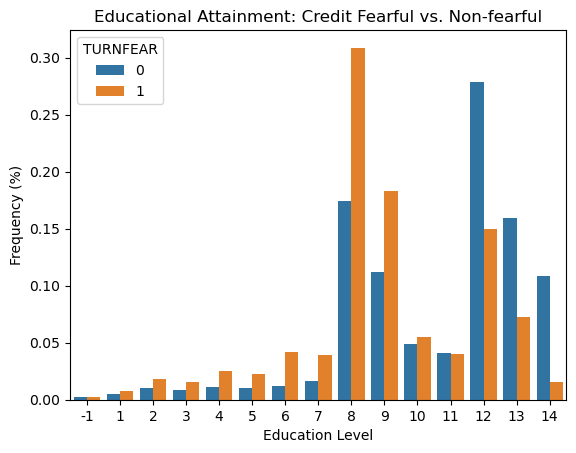

In [11]:
#Task 6.1.16: Using seaborn, create a side-by-side bar chart of df_educ. Set hue to "TURNFEAR", and make sure that the education categories are in the correct order along the x-axis. 
#Label to the x-axis "Education Level", the y-axis "Frequency (%)", and use the title "Educational Attainment: Credit Fearful vs. Non-fearful".


 #Create bar chart of `df_educ`

sns.barplot(
   x="EDUC",
   y="frequency",
   hue="TURNFEAR",
   data=df_educ,
  
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

In [13]:
#In this plot, we can see that a much higher proportion of credit-fearful respondents have only a high school diploma, while university degrees are more common among the non-credit fearful.


<Axes: xlabel='DEBT', ylabel='ASSET'>

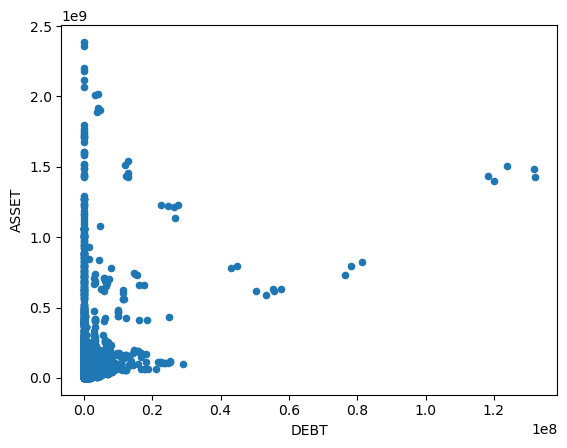

In [14]:
#Task 6.1.17Use df to make a scatter plot showing the relationship between DEBT and ASSET.
# Create scatter plot of ASSET vs DEBT, df
df.plot.scatter(x="DEBT", y=("ASSET"))

<Axes: xlabel='DEBT', ylabel='ASSET'>

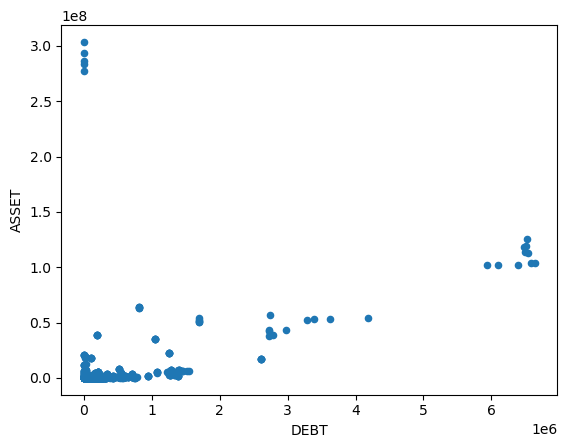

In [16]:
#Task 6.1.18: Use df_fear to make a scatter plot showing the relationship between DEBT and ASSET.
#Create scatter plot of ASSET vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT", y=("ASSET"))

In [17]:
#You can see relationship in our df_fear graph is flatter than the one in our df graph, but they clearly are different.

#Let's end with the most striking difference from our matrices, and make some scatter plots showing the difference between HOUSES and DEBT.

<Axes: xlabel='DEBT', ylabel='HOUSES'>

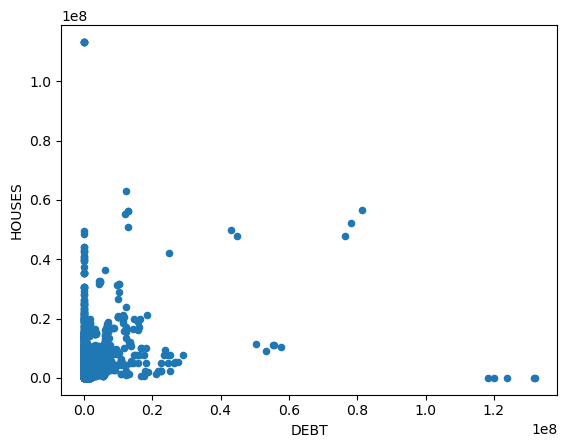

In [18]:
#Task 6.1.19: Use df to make a scatter plot showing the relationship between HOUSES and DEBT.

# Create scatter plot of HOUSES vs DEBT, df
df.plot.scatter(x="DEBT", y=("HOUSES"))

<Axes: xlabel='DEBT', ylabel='HOUSES'>

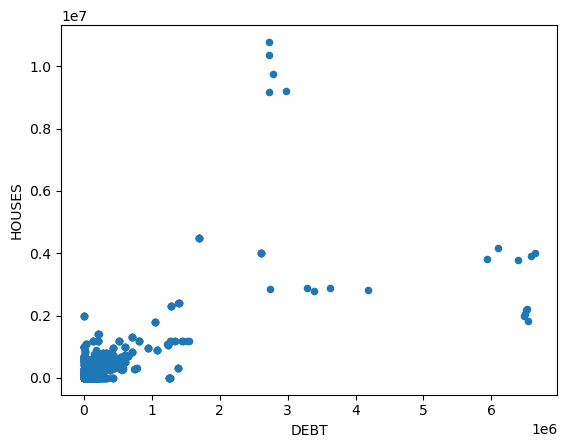

In [19]:
#task 6.1.20: Use df_fear to make a scatter plot showing the relationship between HOUSES and DEBT.
# Create scatter plot of HOUSES vs DEBT, df_fear
df_fear.plot.scatter(x="DEBT", y=("HOUSES"))


In [ ]:
#The outliers make it a little difficult to see the difference between these two plots, but the relationship is clear enough: our df_fear graph shows an almost perfect linear relationship, while our df graph shows something a little more muddled. You might also notice that the datapoints on the df_fear graph form several little groups. 
#Those are called "clusters," and we'll be talking more about how to analyze clustered data in the next lesson.